# CODECHEF RECRUITMENT TASK
## EXPLORATORY DATA  ANALYIS - Haberman Dataset
### AIM : To perform EDA on the given dataset and find out the trends in the data about number of deaths caused due to Breast Cancer , avg age of disease hit and draw conculsions and solutions out of it.
#### NAME : CHIRANTHANA R R

## IMPORTING ALL THE LIBRARIES

In [86]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## READING THE DATA

In [87]:
df = pd.read_csv("haberman.csv")

## DATA INSIGHTS

In [88]:
##first 5 rows
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [89]:
df.shape

(306, 4)

In [90]:
##last five rows
df.tail()

,age,year,nodes,status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [91]:
df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [92]:
##SUMMERISED DETAILED ANALYSIS USING DESCFRIBE METHOD
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [111]:
##information regarding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


## DATA CLEANING 

In [93]:
##CHECKING FOR MISSING VALUES
missing_values_count = df.isnull().sum()
print (missing_values_count)

age       0
year      0
nodes     0
status    0
dtype: int64


#### AS THERE ARE NO NULL VALUES DATA CLEANING IS NOT REQUIRED

## DATA VISUALIZATION

In [94]:
print('Total patients:',df['status'].count())

Total patients: 306


In [95]:
##NOTE : 1 = patient survived more then 5 years.
##       2 = patient survived less than 5 years
print('Total patients:',df['status'].value_counts())

Total patients: 1    225
2     81
Name: status, dtype: int64


#### WE CAN SEE THERE IS POSTIVE SIDE OF RECOVERY RATIO WHERE PEOPLE HAVE LIVED MORE THAN 5 YEARS
#### BUT STILL 225:81 IS A HUGE RATIO , HENCE WE WILL ANALYSE IT VISUALLY

<AxesSubplot:xlabel='status', ylabel='count'>

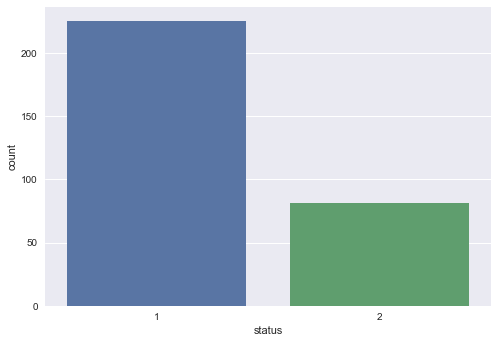

In [96]:
sns.countplot(x=df['status'])

In [97]:
##calculation correlational value
column_1 = df["age"]
column_2 = df["status"]
correlation = column_1.corr(column_2)
print(correlation)

0.06795032439910388


#### zero correlation value means no linear relationship between the two columns
#### Hence , age does not matter the survival rate

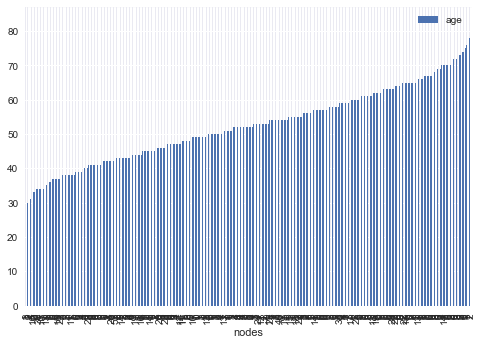

In [101]:
df.plot(kind='bar',x='nodes',y='age')
plt.show()

In [104]:
Top_10_largest_number_of_nodes = df.groupby("age").nodes.sum().nlargest(n =10)
print(Top_10_largest_number_of_nodes)

age
54    129
43     79
55     67
53     58
34     57
47     52
44     51
59     50
60     45
38     44
Name: nodes, dtype: int64


#### LARGEST NUMBER OF NODES IS IRRESPECTIVE OF THE PERSON'S AGE

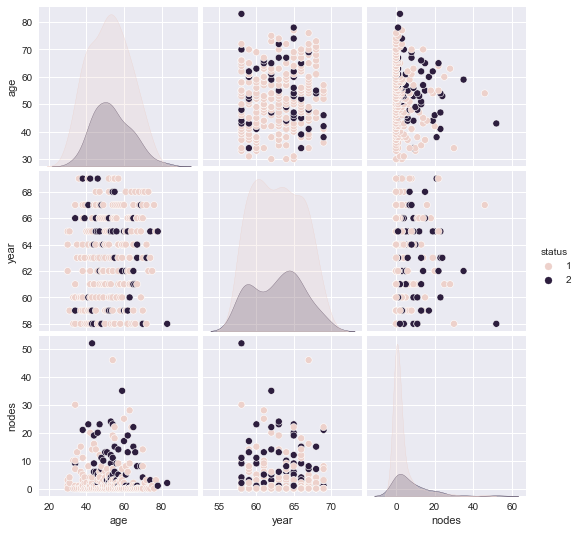

In [107]:
sns.pairplot(df,hue='status')

####  AGE DOESNT PLAY A MAJOR ROLE
####  SLIGHT REDUCTION IN THE LYMPH NODES AS YEARS PASSED BY HENCE LONG TERM SURVIVAL


C:\Users\chiranthana\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\chiranthana\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\chiranthana\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\chiranthana\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\chiranthana\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\chiranthana\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance;

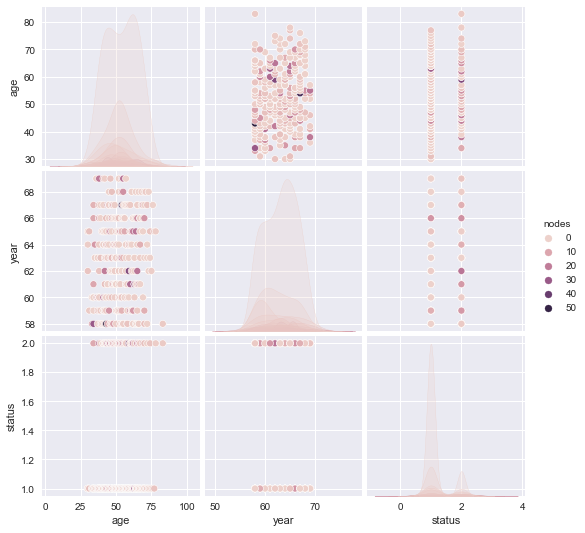

In [108]:
sns.pairplot(df,hue='nodes')

#### NUMBER OF NODES IS WIDELY DISTRIBUTED WITH 0-50

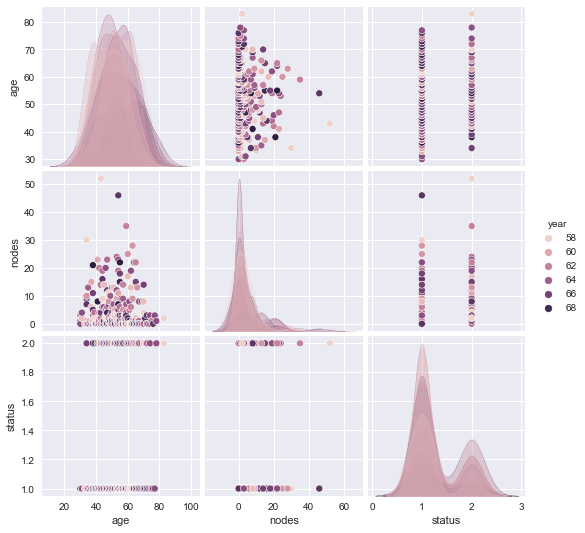

In [109]:
sns.pairplot(df,hue='year')

####  MORE THE NUMBER OF NODES , LESS SURVIVAL PERIOD

<AxesSubplot:>

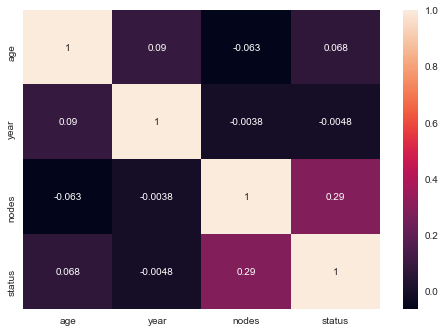

In [110]:
sns.heatmap(df.corr(), annot = True)

#### NO STRONG CORELATION

C:\Users\chiranthana\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\chiranthana\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\chiranthana\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


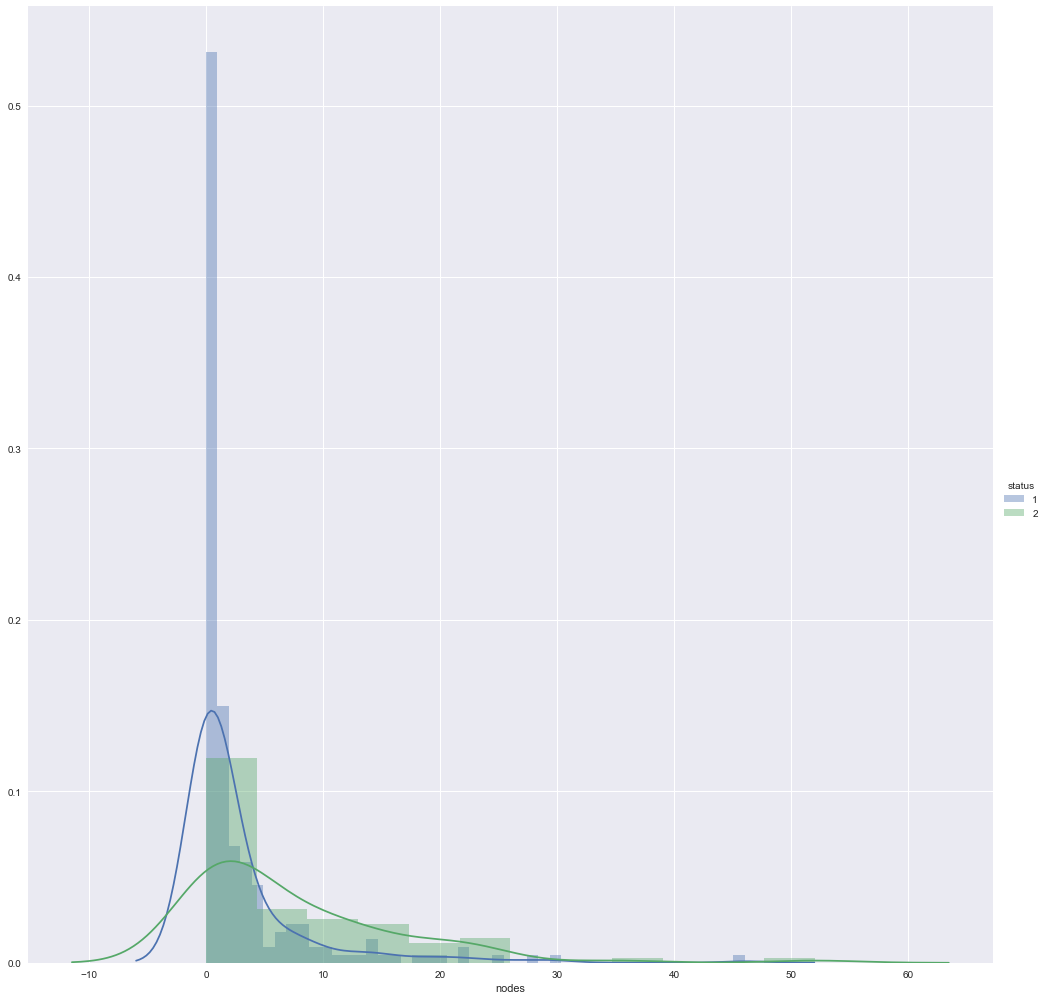

In [122]:
sns.FacetGrid(df,hue="status",size=14).map(sns.distplot,"nodes").add_legend()

#### AFTER ANALYSING THE DATA, COMING UP WITH BEST PROBABILITY:


if (nodes<=0):
    patient = long survival
else if nodes>=0 && nodes<=3.5(approx):
    patient = ideal longterm chances  
else if nodes>=3.5:
    patient = short term survival
    
  

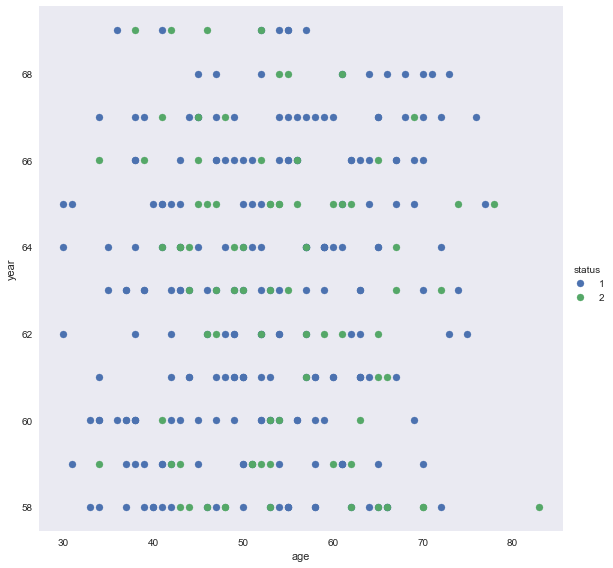

In [137]:
sns.set_style("dark")
sns.FacetGrid(df,hue="status",height = 8).map(plt.scatter,"age","year").add_legend()

plt.show()

#### PATIENTS AGED MORE THAN 50 WITH NODES>10 HAVE LESS CHANCES FOR SURVIVAL

<ipython-input-138-7b9019366dda>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  year1=df.groupby(['year'])['age','nodes','status'].sum()


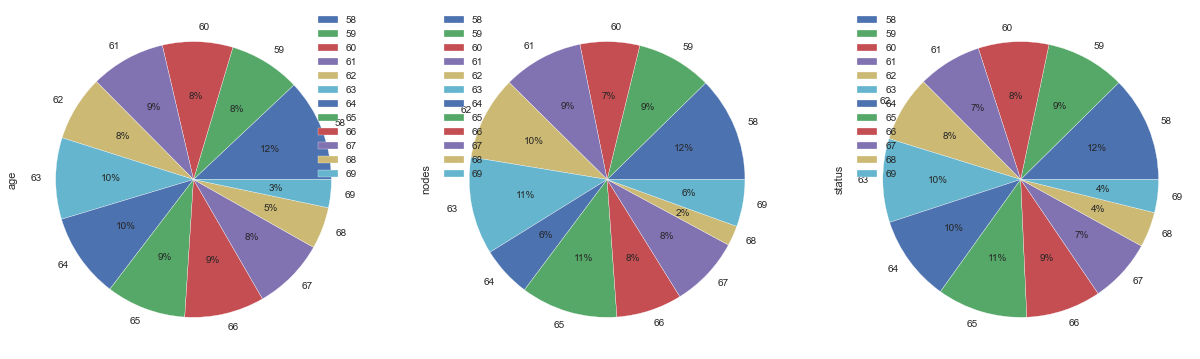

In [138]:
year1=df.groupby(['year'])['age','nodes','status'].sum()
year1.plot.pie(autopct='%1.lf%%', label=year1.index,subplots=True,figsize=(21,10))
plt.show()

<ipython-input-140-5ee59bdb16b1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  status1=df.groupby(['status'])['age','nodes','year'].sum()


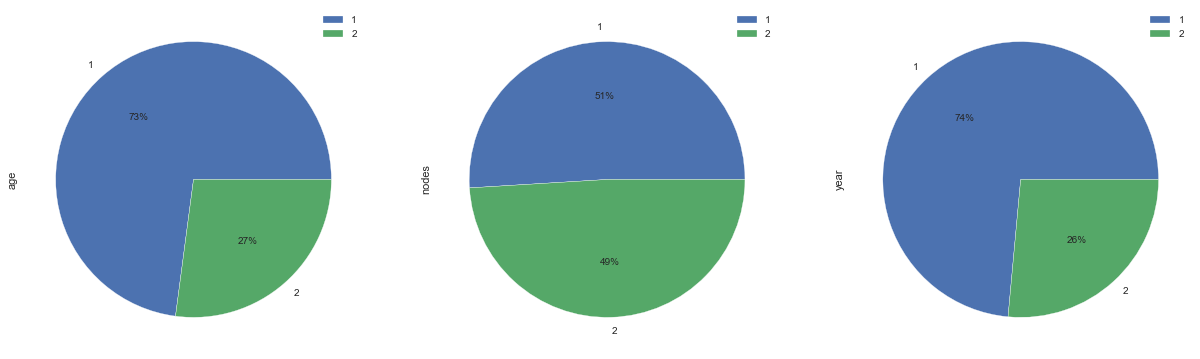

In [140]:
status1=df.groupby(['status'])['age','nodes','year'].sum()
status1.plot.pie(autopct='%1.lf%%', label=status1.index,subplots=True,figsize=(21,10))
plt.show()

<ipython-input-141-c6f43952c88f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  nodes1=df.groupby(['nodes'])['age','status','year'].sum()


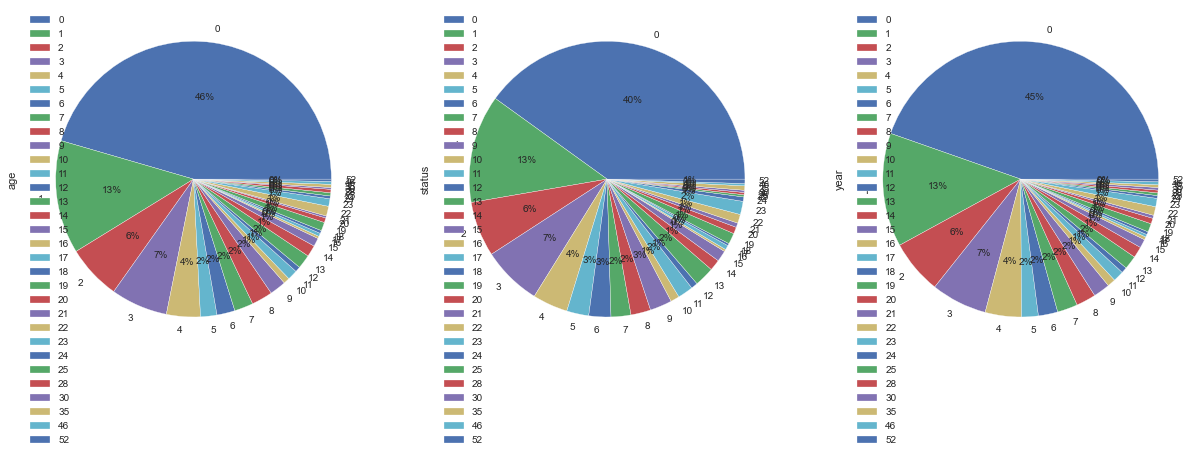

In [141]:
nodes1=df.groupby(['nodes'])['age','status','year'].sum()
nodes1.plot.pie(autopct='%1.lf%%', label=nodes1.index,subplots=True,figsize=(21,10))
plt.show()

<ipython-input-142-a128a28d281b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  age1=df.groupby(['age'])['nodes','status','year'].sum()


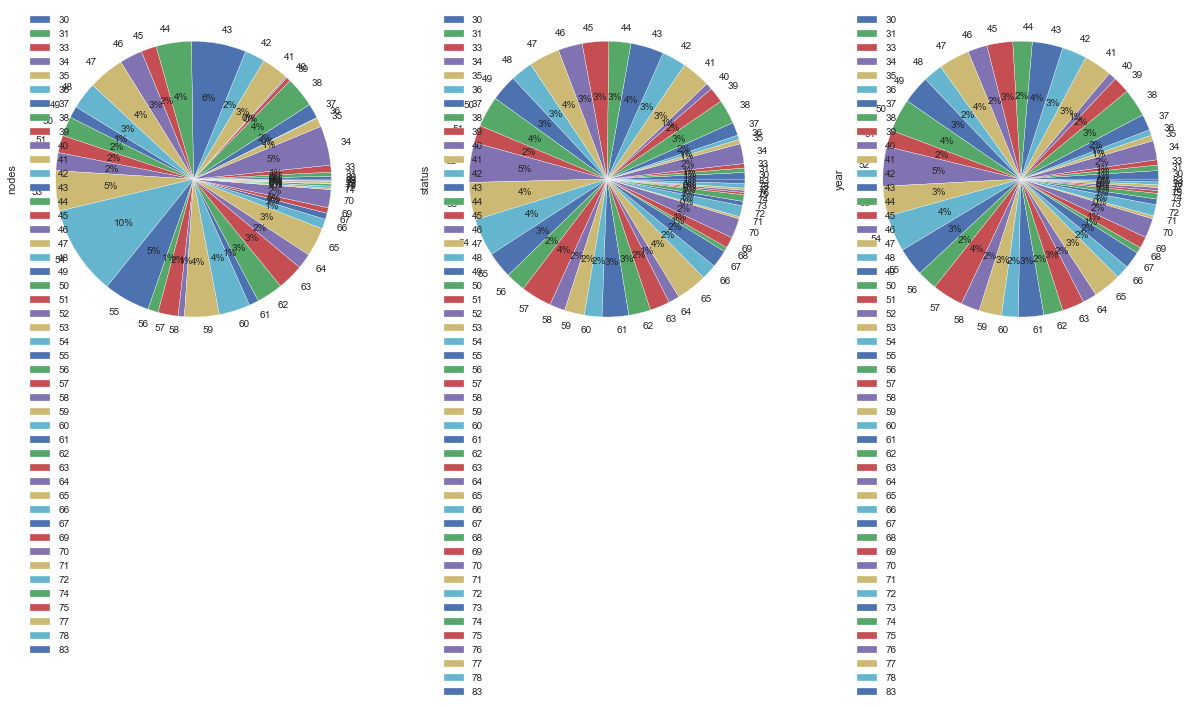

In [142]:
age1=df.groupby(['age'])['nodes','status','year'].sum()
age1.plot.pie(autopct='%1.lf%%', label=age1.index,subplots=True,figsize=(21,10))
plt.show()

# INSIGHTS :
1) Total patients are 306 out of which 225 survived more than 5 years while the rest 81 survived less than 5 years

2) Mean of number of nodes was 4 out of all recorded data 

3) Correlation between age and status = 0.06795032439910388

4) If the patient is recorded with nodes =50 , sure deaths 

5)Irrespective of the patients age,it doesnt play a major role in survival status but rougly,patients aged more than 50 with nodes>10 have less chances for survival

6) Patients with nodes<=0 , have long term survival status

7)Patients with nodes>=0 && nodes<=3.5(approx): , have ideal longterm chances  

8)Patients with nodes>=3.5: , have short term survival status

9)After analysing the pie charts , we can tell that the data is hugely varid , but the above insights can be drawn by noticing trends and making practical assumptions.
    
    

# CONCLUSIONS AND SOLUTIONS:
1) Cancer can be declared

2) Than looking it on the positive note that out of all patients , number of recoveries is more , look at the least favourable statistics which is 81 short time survival . This will let more deep research and more insights and causes to lower it to ideal 1:0 recovery to unrecovery ratio.

3) As observed age doesnt play a major role , person of any can be diagnoised with cancer hence awarness on regular checkups.

4) More care for older people

5) As lymph nodes do play a major role in cancer , proper observation of the lymph node count in the body.



### THANK YOU 
